# BOUKAID Aya

Nous disposons d'une dataset contenant des leads. Notre objectif est de déterminer s'ils se convertiront en clients.

# Importation des biblios 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# lecture des donnees 

In [2]:
data = pd.read_csv("bank-full.csv" ,sep=";")
df= data.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Exploration des donnees avec analyse

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


on a 45211 ligne dans cette dataset 

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

1. age : nombre 
2. job : le type de travail du lead
3. marital :  etat civil du client marie , divorce , celibataire
4. education : niveau d'etude
5. default : est ce qu ' il a deja un credit
6. balance : représente le montant moyen d’argent détenu sur le compte tout au long d’une année.
7. housing : est ce qu'il a deja une maison
8. loan : est ce qu'il a deja un credit
9. contact : type de la communication contact ("unknown","telephone","cellular")
10. day : dernier jour de contact du mois
11. month : dernier mois de contact d'annee
12. duration : duree du dernier contact en seconde
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

 =>  Output variable (desired target):
=>  y - has the client subscribed a term deposit? (binary: "yes","no")

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Dans cette dataset on n'a pas des champs null

In [7]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

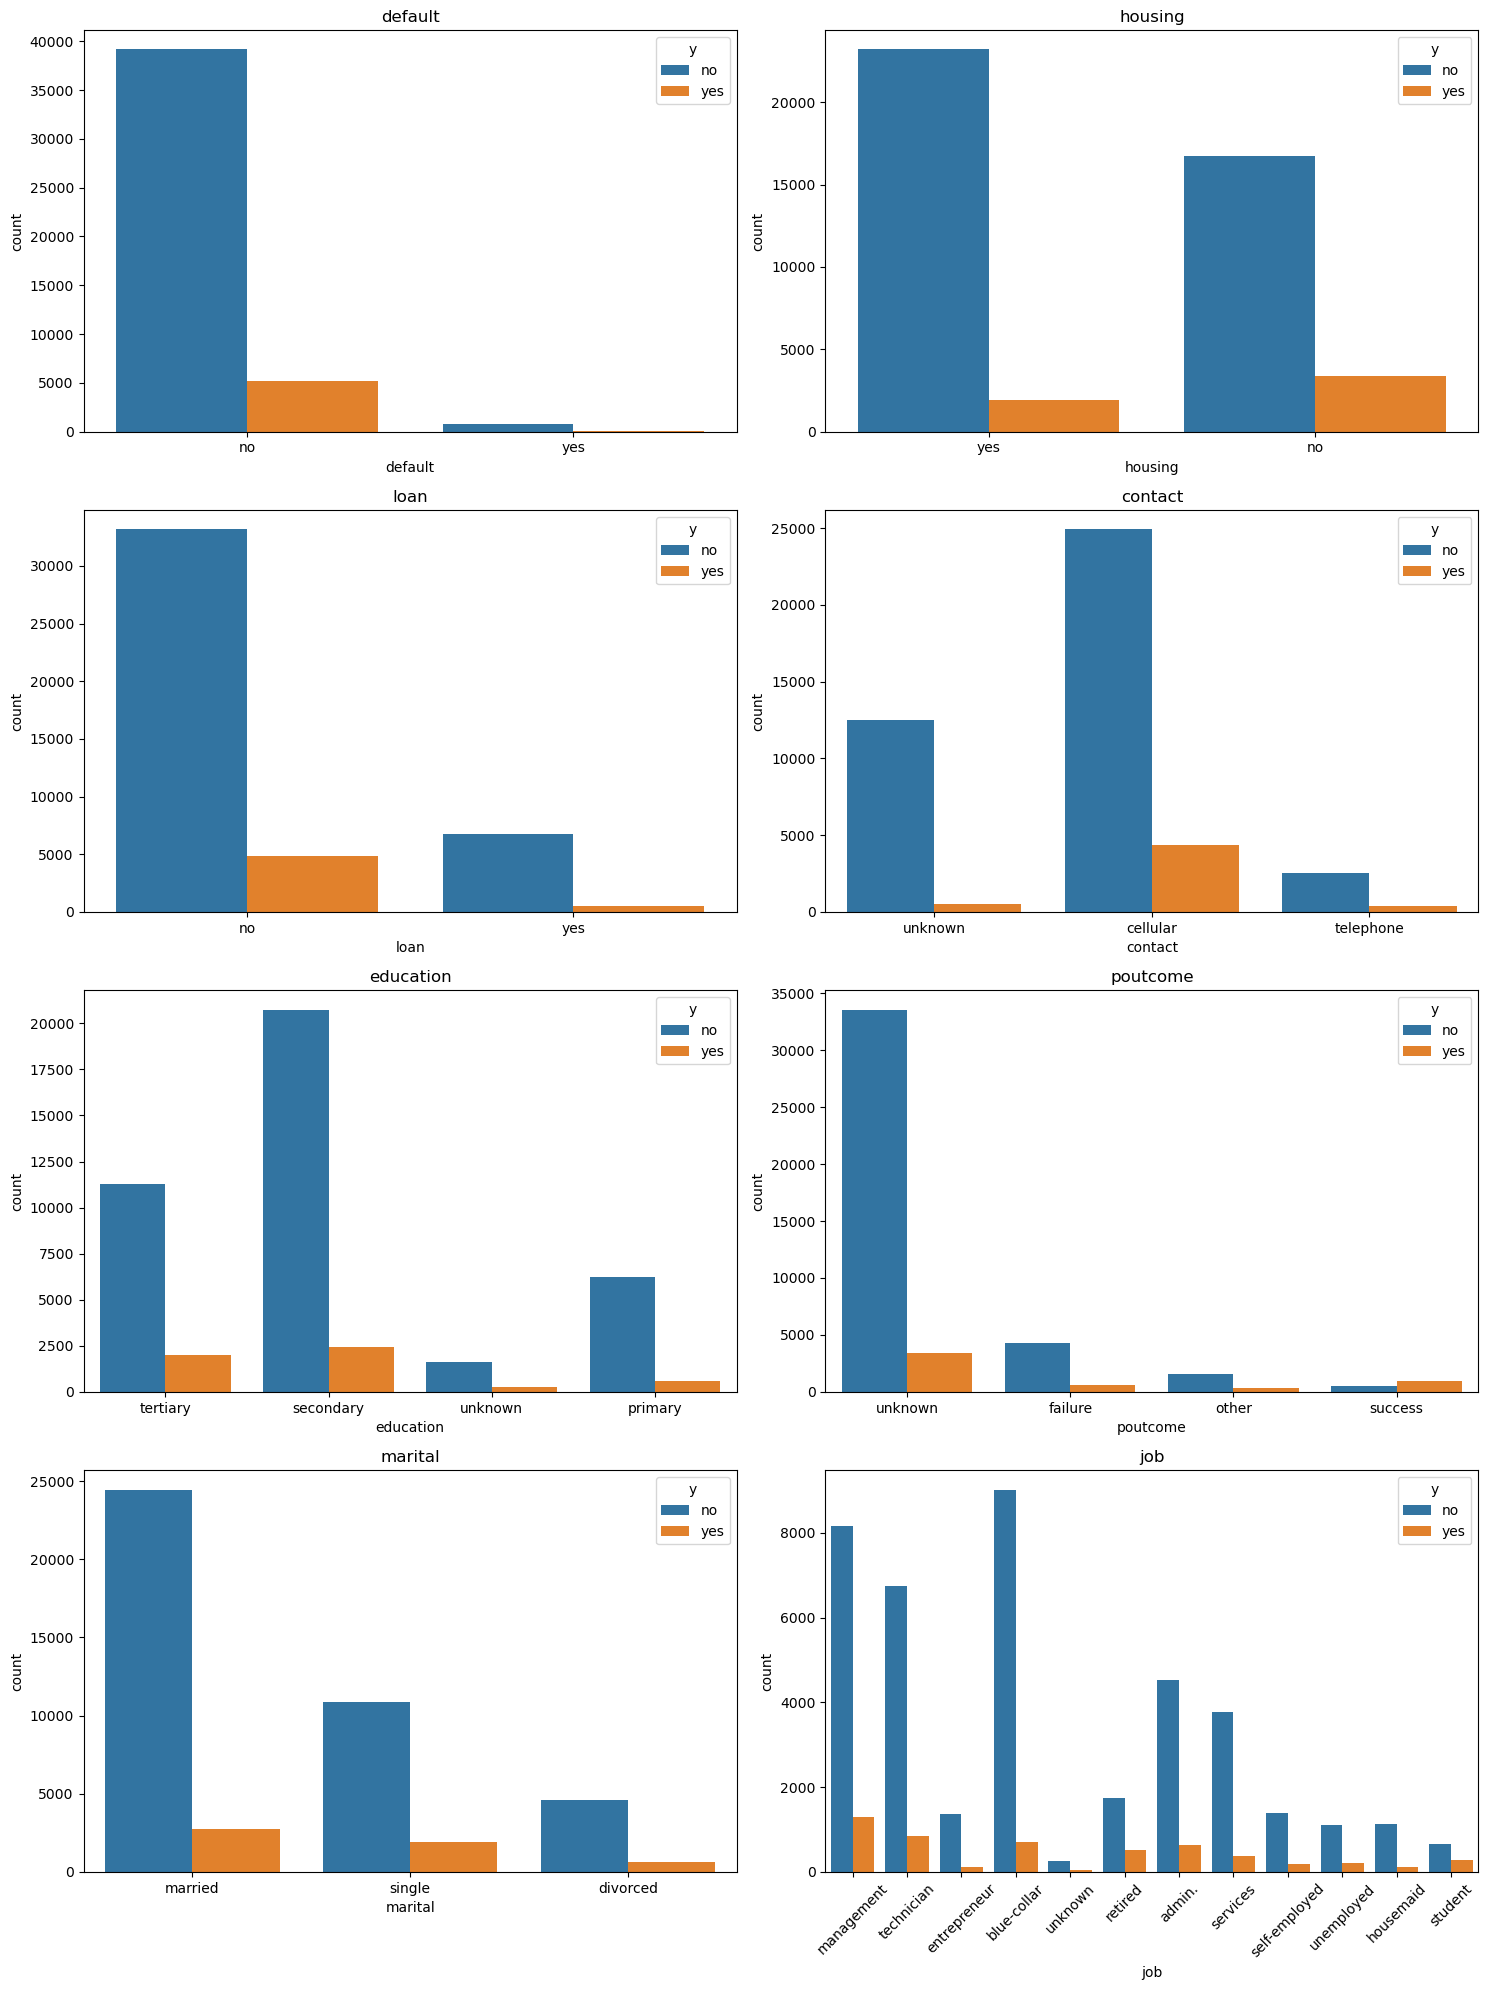

In [9]:
x_variables = df[['default', 'housing', 'loan', 'contact', 'education', 'poutcome', 'marital', 'job']]

fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # Adjusted to 4x2 grid

for i, x_var in enumerate(x_variables):
    row, col = divmod(i, 2)  # Divide by 2 for 4 rows and 2 columns
    sns.countplot(x=x_var, hue='y', data=df, ax=axes[row, col])
    axes[row, col].set_title(x_var)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
#sns.pairplot(num_lab,hue='y')

# Data cleaning

In [11]:
mois = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df['month']=df['month'].replace(mois)

In [12]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [13]:
bool_ = {'no':0,'yes':1}
df[['default','housing','loan','y']]=df[['default','housing','loan','y']].replace(bool_)
df[['default','housing','loan','y']]


,default,housing,loan,y
0,0,1,0,0
1,0,1,0,0
2,0,1,1,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
45206,0,0,0,1
45207,0,0,0,1
45208,0,0,0,1
45209,0,0,0,0


<Axes: >

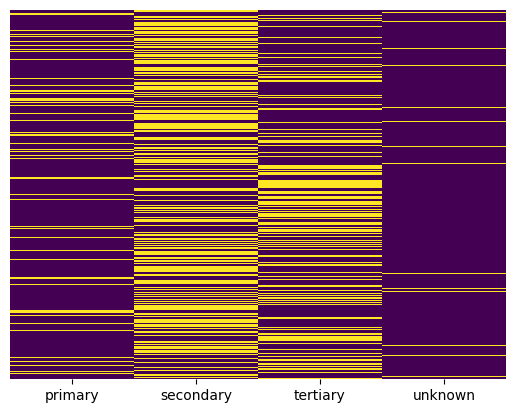

In [14]:
education_=pd.get_dummies(df['education'],dtype=int)
education_
sns.heatmap(education_,yticklabels=False,cbar=False,cmap='viridis')


<Axes: >

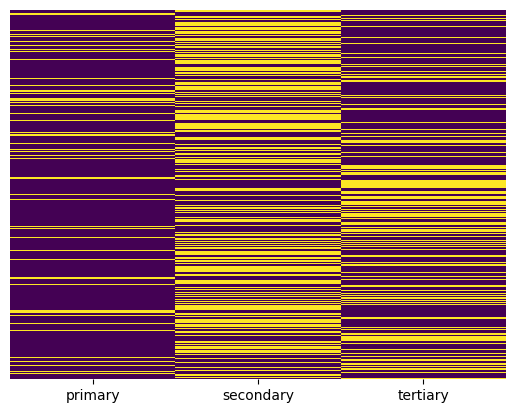

In [15]:
education_=education_[['primary', 'secondary', 'tertiary']]
sns.heatmap(education_,yticklabels=False,cbar=False,cmap='viridis')


<Axes: >

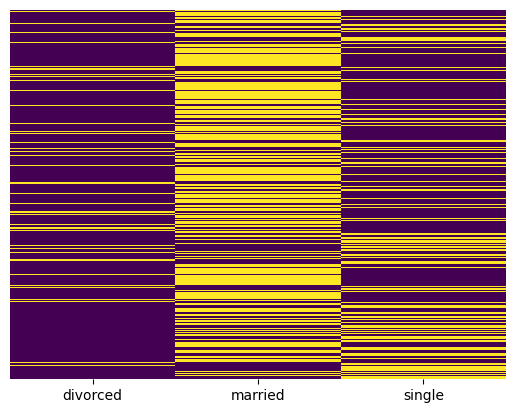

In [16]:
marital_=pd.get_dummies(df['marital'],dtype=int)
sns.heatmap(marital_,yticklabels=False,cbar=False,cmap='viridis')

In [17]:
df=pd.concat([df,education_,marital_],axis=1)

In [18]:
df.drop(['marital','education'],axis=1,inplace=True)

In [19]:
df.columns

Index(['age', 'job', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y',
       'primary', 'secondary', 'tertiary', 'divorced', 'married', 'single'],
      dtype='object')

In [20]:
df['contact'].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [21]:
contact_={'cellular':1,'unknown':2,'telephone':3}
df['contact']=df['contact'].replace(contact_)

In [22]:
df['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [23]:
df['poutcome'] = df['poutcome'].replace('unknown', 'other')

In [24]:
poutcome_={'success':1,'failure':2,'other':3}
df['poutcome'] = df['poutcome'].replace(poutcome_)
df['poutcome'].value_counts()


poutcome
3    38799
2     4901
1     1511
Name: count, dtype: int64

In [25]:
df.head()

,age,job,default,balance,housing,loan,contact,day,month,duration,...,pdays,previous,poutcome,y,primary,secondary,tertiary,divorced,married,single
0,58,management,0,2143,1,0,2,5,5,261,...,-1,0,3,0,0,0,1,0,1,0
1,44,technician,0,29,1,0,2,5,5,151,...,-1,0,3,0,0,1,0,0,0,1
2,33,entrepreneur,0,2,1,1,2,5,5,76,...,-1,0,3,0,0,1,0,0,1,0
3,47,blue-collar,0,1506,1,0,2,5,5,92,...,-1,0,3,0,0,0,0,0,1,0
4,33,unknown,0,1,0,0,2,5,5,198,...,-1,0,3,0,0,0,0,0,0,1


In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'job' column
df['job_encoded'] = label_encoder.fit_transform(df['job'])

# Display the mapping of original labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}


In [27]:
df.head()

,age,job,default,balance,housing,loan,contact,day,month,duration,...,previous,poutcome,y,primary,secondary,tertiary,divorced,married,single,job_encoded
0,58,management,0,2143,1,0,2,5,5,261,...,0,3,0,0,0,1,0,1,0,4
1,44,technician,0,29,1,0,2,5,5,151,...,0,3,0,0,1,0,0,0,1,9
2,33,entrepreneur,0,2,1,1,2,5,5,76,...,0,3,0,0,1,0,0,1,0,2
3,47,blue-collar,0,1506,1,0,2,5,5,92,...,0,3,0,0,0,0,0,1,0,1
4,33,unknown,0,1,0,0,2,5,5,198,...,0,3,0,0,0,0,0,0,1,11


In [28]:
df.drop('job',axis=1,inplace=True)

In [29]:
df.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,previous,poutcome,y,primary,secondary,tertiary,divorced,married,single,job_encoded
0,58,0,2143,1,0,2,5,5,261,1,...,0,3,0,0,0,1,0,1,0,4
1,44,0,29,1,0,2,5,5,151,1,...,0,3,0,0,1,0,0,0,1,9
2,33,0,2,1,1,2,5,5,76,1,...,0,3,0,0,1,0,0,1,0,2
3,47,0,1506,1,0,2,5,5,92,1,...,0,3,0,0,0,0,0,1,0,1
4,33,0,1,0,0,2,5,5,198,1,...,0,3,0,0,0,0,0,0,1,11


In [30]:
df.dtypes

age            int64
default        int64
balance        int64
housing        int64
loan           int64
contact        int64
day            int64
month          int64
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome       int64
y              int64
primary        int32
secondary      int32
tertiary       int32
divorced       int32
married        int32
single         int32
job_encoded    int32
dtype: object

In [31]:
#sns.pairplot(data=df,hue='y')
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y',
       'primary', 'secondary', 'tertiary', 'divorced', 'married', 'single',
       'job_encoded'],
      dtype='object')

# Regression Logistic

In [32]:
from sklearn.model_selection import train_test_split
x=df[['age', 'default', 'balance', 'housing', 'loan', 'contact', 'day','month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome','primary', 'secondary', 'tertiary', 'divorced', 'married', 'single','job_encoded']]
y=df[['y']]

In [33]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=101)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [40]:

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Reshape y_train to a 1d array
y_train_reshaped = y_train.values.ravel()

# Initialize and fit Logistic Regression model
logReg = LogisticRegression(max_iter=1000)  # Increase max_iter
logReg.fit(x_train_scaled, y_train_reshaped)

LogisticRegression(max_iter=1000)

In [41]:
accuracy = logReg.score(x_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9017251548215865


The logistic regression model achieved an accuracy score of approximately 90.17% on the test set, indicating that it correctly predicts whether a client subscribes to a term deposit or not about 90.17% of the time

In [43]:
prediction = logReg.predict(x_test_scaled)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11967
           1       0.68      0.31      0.43      1597

    accuracy                           0.90     13564
   macro avg       0.80      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564



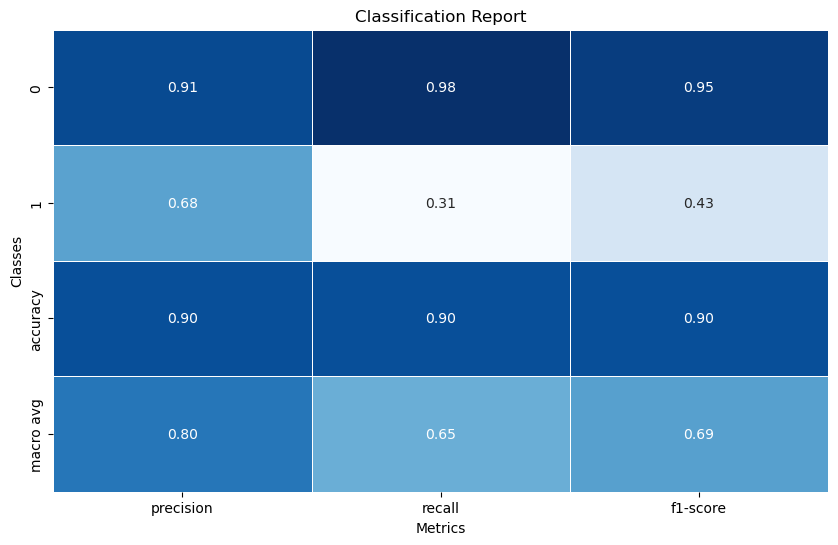

In [46]:
report = classification_report(y_test, prediction, output_dict=True)

# Convert the classification report to a DataFrame for easier visualization
df_report = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, cbar=False)
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('Classification Report')
plt.show()

1. **Précision** :
   - Pour la classe 0 (clients qui ne souscrivent pas à un dépôt à terme), la précision est de 0,91, ce qui signifie que parmi toutes les instances prédites comme ne souscrivant pas à un dépôt à terme, 91 % sont correctement classées.
   - Pour la classe 1 (clients qui souscrivent à un dépôt à terme), la précision est de 0,68, ce qui signifie que parmi toutes les instances prédites comme souscrivant à un dépôt à terme, 68 % sont correctement classées.

2. **Rappel** :
   - Pour la classe 0, le rappel est de 0,98, ce qui indique que 98 % des instances réelles de non-souscription à un dépôt à terme ont été correctement classées par le modèle.
   - Pour la classe 1, le rappel est de 0,31, ce qui signifie que seuls 31 % des instances réelles de souscription à un dépôt à terme ont été correctement classées par le modèle.

3. **Score F1** :
   - Le score F1 est la moyenne harmonique de la précision et du rappel. Il offre un équilibre entre la précision et le rappel.
   - Pour la classe 0, le score F1 est de 0,95, ce qui est élevé, indiquant un bon équilibre entre la précision et le rappel.
   - Pour la classe 1, le score F1 est de 0,43, ce qui est inférieur à celui de la classe 0, indiquant un compromis entre la précision et le rappel.

4. **Support** :
   - Le support fait référence au nombre d'occurrences réelles de chaque classe dans l'ensemble de test. Il fournit un contexte pour les métriques de précision, de rappel et de score F1.
   - La classe 0 a un support beaucoup plus élevé (11 967 instances) par rapport à la classe 1 (1 597 instances), indiquant un déséquilibre de classe.

5. **Précision globale** :
   - La précision globale du modèle est de 0,90, ce qui signifie qu'il prédit correctement 90 % des instances dans l'ensemble de test. Cependant, il est important de noter que la précision seule peut ne pas fournir une image complète, surtout dans les ensembles de données déséquilibrés.

6. **Moyenne Macro et Moyenne Pondérée** :
   - La moyenne macro de la précision, du rappel et du score F1 fournit la moyenne non pondérée de ces métriques pour les deux classes.
   - La moyenne pondérée fournit la moyenne pondérée de ces métriques, où le score de chaque classe est pondéré par son support.
   - Les moyennes macro et pondérée sont inférieures aux métriques de la classe 0, ce qui reflète la performance inférieure pour la classe 1.

Dans l'ensemble, ces métriques indiquent que bien que le modèle performe bien dans la prédiction de la classe 0 (clients qui ne souscrivent pas à un dépôt à terme), il éprouve des difficultés avec la classe 1 (clients qui souscrivent à un dépôt à terme), probablement en raison du déséquilibre des classes. Une évaluation plus approfondie et des ajustements éventuels du modèle peuvent être nécessaires pour améliorer la performance, en particulier pour la classe 1.